In [2]:
library(tibble)
library(ggplot2)

Let's use the code provided below to generate a dataset representing two populations, each sampled from a Guassian with a specific population mean. Here I am generating only 5 samples

In [3]:
data_1 <- tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 <- tibble(measure=rnorm(5, 12, 1))
data_2$site_name <- 'Site 2'
complete_data <- rbind(data_1, data_2)
head(complete_data)

measure,site_name
<dbl>,<chr>
8.718215,Site 1
8.757603,Site 1
10.108568,Site 1
7.429724,Site 1
9.347544,Site 1
12.176091,Site 2


* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [4]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 8.872331

[1] 12.13067

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed.

In [5]:
tapply(complete_data$measure, complete_data$site_name, mean)

Site 1    Site 2 
 8.872331 12.130666

Q.2 

* Use the bootstrapping-procedure covered in class to assess whether there is a statistically significant difference between the data in `Site 1` and that in `Site 2`.

Make sure you follow the approach discussed in class and which consists of:

1. Selecting an appropriate test statistic
2. Bootstrapping a a distribuion for the observed statistic under the null hypothesis
3. Desciding whether to accept or reject the null based on the probability of the null
4. provide a p-value to support your decision.


In [6]:
data_1 <- tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 <- tibble(measure=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_data <- rbind(data_1, data_2)

In [7]:
tapply(complete_data$measure, complete_data$site_name, mean)

Site 1   Site 2 
10.05473 13.20516

#### Q2.0 

Complete the following by describing the null and the alternative hypotheses we are testing here.


In [71]:
print("If there is no statistically significant difference between data_1 and data_2, the null hypothesis is accepted. If the difference between the two datasets is unlikely to have arisen from chance, the null hypothesis is rejected and the alternative hypothesis is not rejected.")


[1] "If there is no statistically significant difference between data_1 and data_2, the null hypothesis is accepted. If the difference between the two datasets is unlikely to have arisen from chance, the null hypothesis is rejected and the alternative hypothesis is not rejected."


#### Q.2.1 

Produce a graph similar the one below (geom_density) display the distributions. If you're using the same seed as mine, your graph will look exactly the same as the one below 

![](https://www.dropbox.com/s/rz5jxm84kk8ac1m/dist.png?dl=1)

[1] "Looks a little bit not Gaussian to me... not sure if anything is wrong."


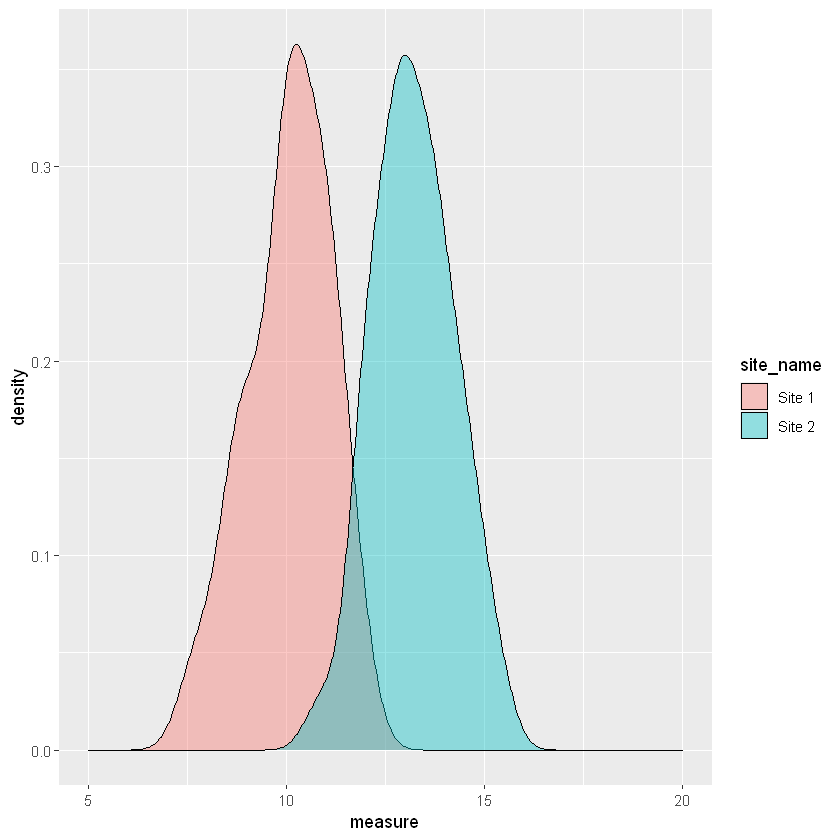

In [73]:
ggplot(complete_data, aes(x = measure, fill = site_name))+
geom_density(alpha = 0.4) +
xlim(5, 20)
print("Looks a little bit not Gaussian to me... not sure if anything is wrong.")

Q2.2 Select a proper test statistic and produce a distribution of the statistic under the null hypothesis. Plot the data as both a histogram and density curves. Your graph may look like this.

![](https://www.dropbox.com/s/3jarqg9swneai0r/mean_under_null.png?dl=1)

Warning message:
"Removed 2 rows containing missing values (geom_bar)."


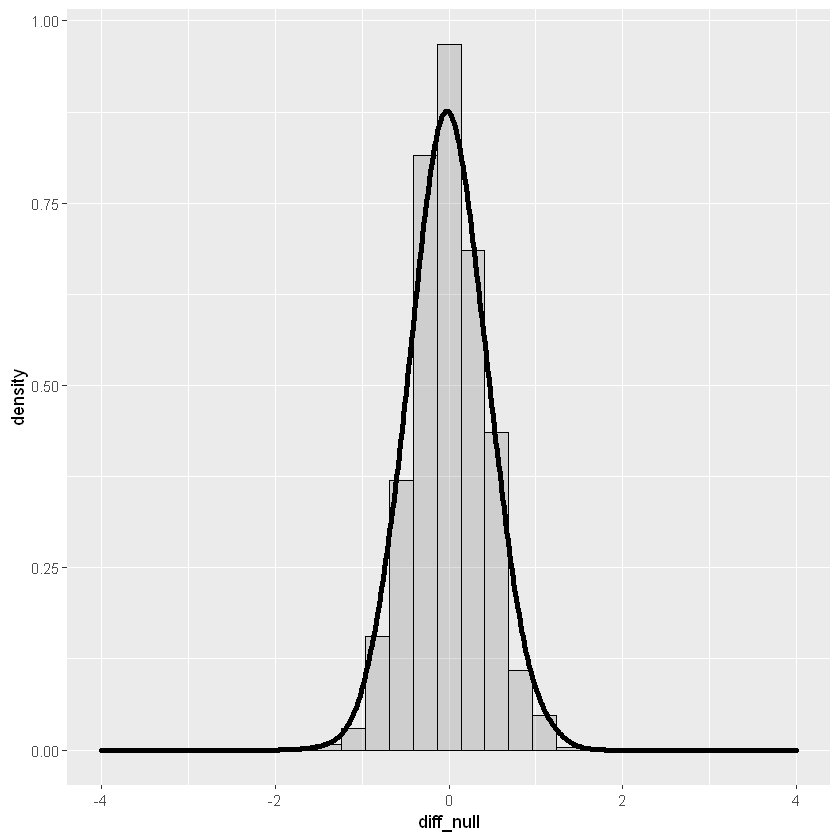

In [75]:
mean_diff <- function(complete_data){
    
shuffled_data <- sample(complete_data$measure)
new_data_1 <- shuffled_data[1:(length(shuffled_data)/2)]
new_data_2 <- shuffled_data[(length(shuffled_data)/2 + 1):length(shuffled_data)]
mean(new_data_1) - mean(new_data_2)
}

diff_null <- replicate(1000, mean_diff(complete_data))
observed_means <- tapply(complete_data$measure, complete_data$site_name, mean)
diff_observed <- observed_means[1] - observed_means[2]
test_plot <- ggplot()+
  geom_histogram(aes(diff_null, y=..density..), bins =30, alpha=0.2, color="black") +
  geom_density(aes(diff_null), bw=0.2, size=1.5) + 
  xlim(-4, 4)

test_plot

####  Q2.3. 

Calculate and plot the observed statistic on the graph you created in Q.2.2. 


Warning message:
"Removed 2 rows containing missing values (geom_bar)."


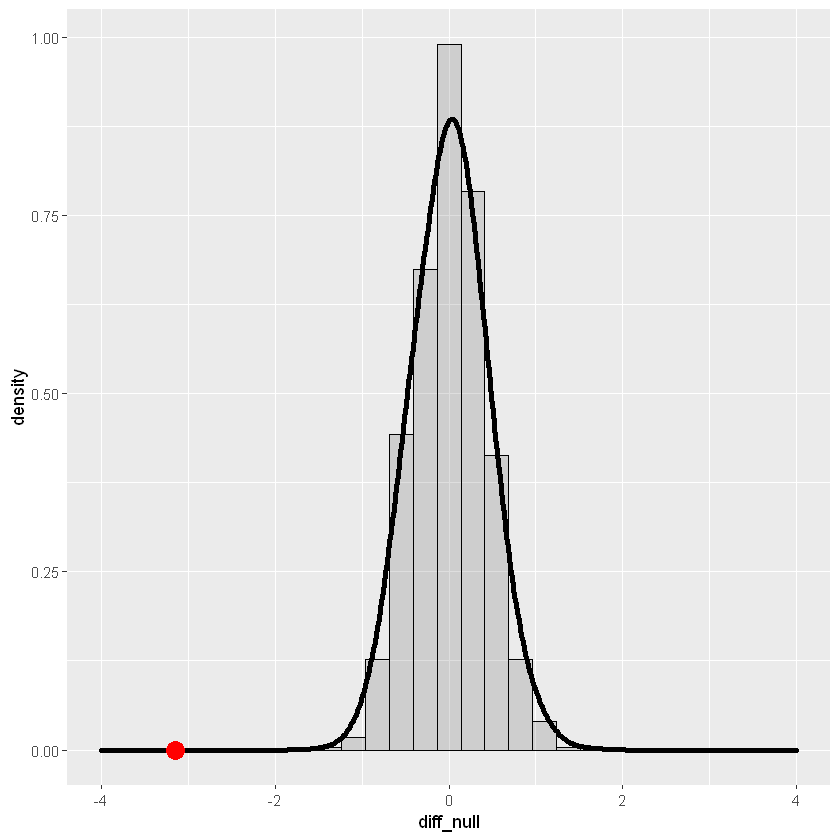

In [13]:
test_plot + geom_point(aes(x=diff_observed, y=0), color = "red", size = 5)

In [ ]:
#### Q2.4 
compute the p-vlaue of the observed statistic under the null. What do you conclude about the hypotheses you enunciated in Q

In [114]:
p_value <- sum(diff_null > diff_observed)  / length(diff_null)
sprintf("The p-value of the observed statistic under the null is %s, therefore we reject the null hypothesis", p_value)

[1] "The p-value of the observed statistic under the null is 0, therefore we reject the null hypothesis"

#### Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed site Y with different environmental conditions and obtains the following proportions for the three corals (0.61, 0.19, 0.20). Use the multinomial non-parametric hypotheses test to assess whether the proportions obtained at sites X and Y are statistically different.


Although not explicitly required, your test should cover all the steps in Q2, i.e. appropriate graph(s) when possible, test statistics, and conclusion.

In [25]:
coral <- rep(c("P. lobata", "M. capitata", "P. mendrina"), 2)
prop_X <- c(0.60, 0.19, 0.21)
prop_Y <- c(0.61, 0.19, 0.20)
site_name <- c(rep("Site_X", 3), rep("Site_Y", 3))
concat_XY <- c(prop_X, prop_Y)
data_coral <- tibble(cbind(site_name, corals, concat_XY))

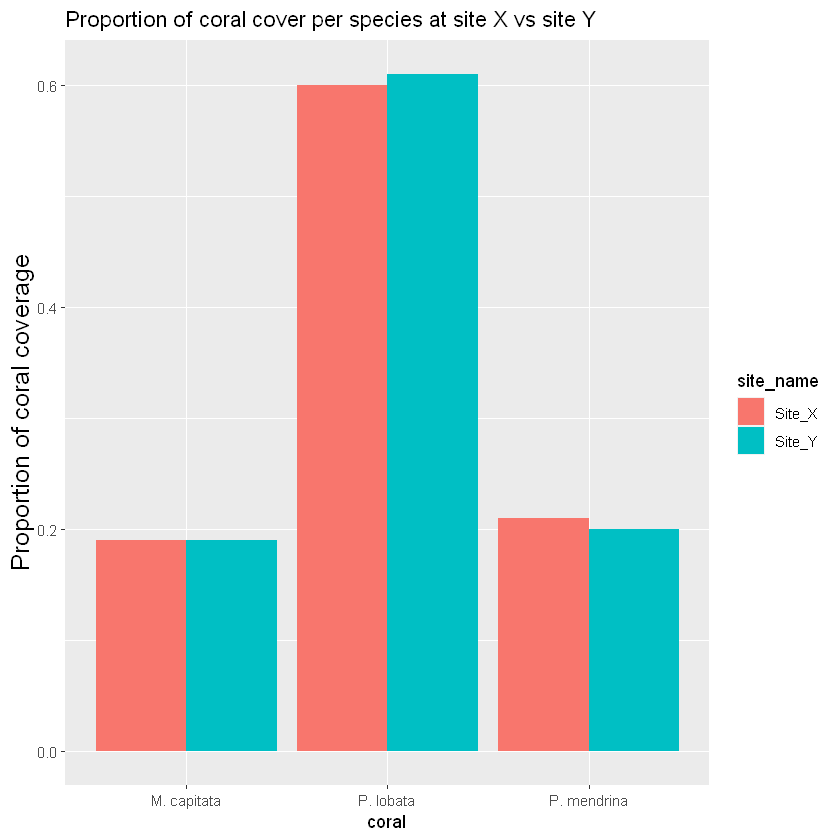

In [42]:
ggplot(data_coral, aes(fill=site_name, x=concat_XY, y=coral)) + 
    geom_bar(position="dodge", stat="identity") +
    ggtitle("Proportion of coral cover per species at site X vs site Y") +
    xlab("Proportion of coral coverage") +
    theme(axis.title.y = element_text(size = 15)) +
    coord_flip()

In [63]:
sample_tvd <- function(prop_x, prop_y){
    sampled_x <- rmultinom(1, 100, prop_x) /100
    sampled_y <- rmultinom(1, 100, prop_y) /100
    sampled_diff <- sum(abs(sampled_x - sampled_y)) / 2
    sampled_diff
}
tvds <- replicate(1000, sample_tvd(prop_X, prop_Y))
observed_diff <- sum(abs(prop_X - prop_Y)) / 2

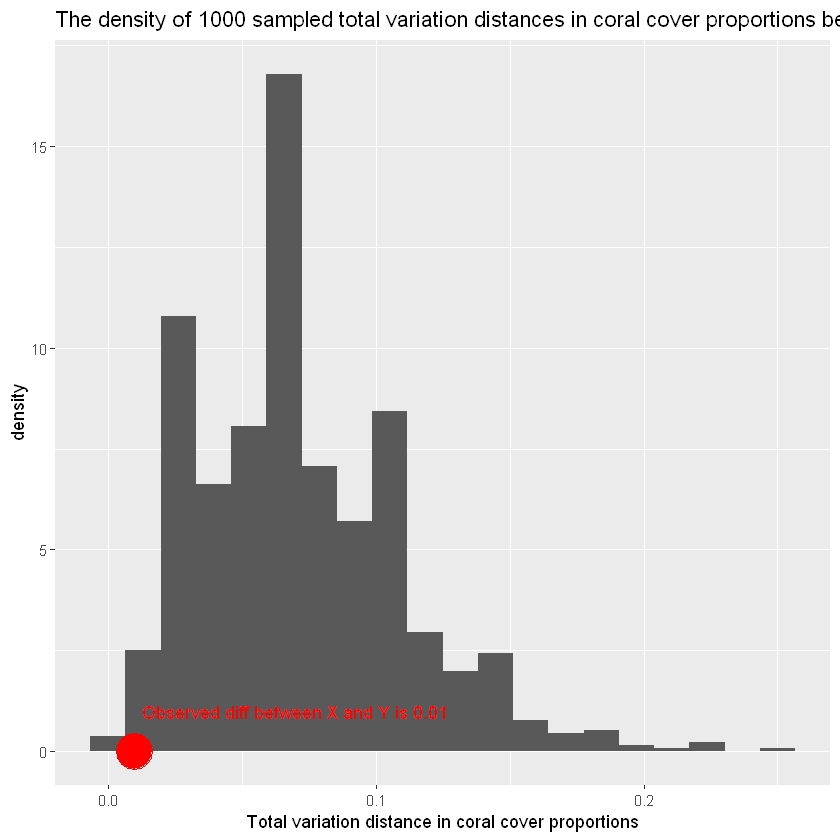

In [83]:
ggplot() +
    geom_histogram(aes(x= tvds, y= ..density..), bins = 20) +
    geom_point(aes(x = observed_diff, y= 0), color = "red", size = 10) +
    annotate(geom="text", x=0.07, y=1, label=sprintf("Observed diff between X and Y is %s", observed_diff), color="red") +
    ggtitle("The density of 1000 sampled total variation distances in coral cover proportions between site X and site Y") +
    xlab("Total variation distance in coral cover proportions")

In [70]:
p_value <- sum(tvds > observed_diff) / length(tvds)
sprintf("The p-value of the observed distance under the null is %s, so we accept the null hypothesis", p_value)

[1] "The p-value of the observed distance under the null is 0.985, so we accept the null hypothesis"